In [86]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [87]:
words = open('../files/names.txt', 'r').read().splitlines()
len(words)

32033

In [88]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i: s for s,i in stoi.items()}

we'll implement the following network architecture

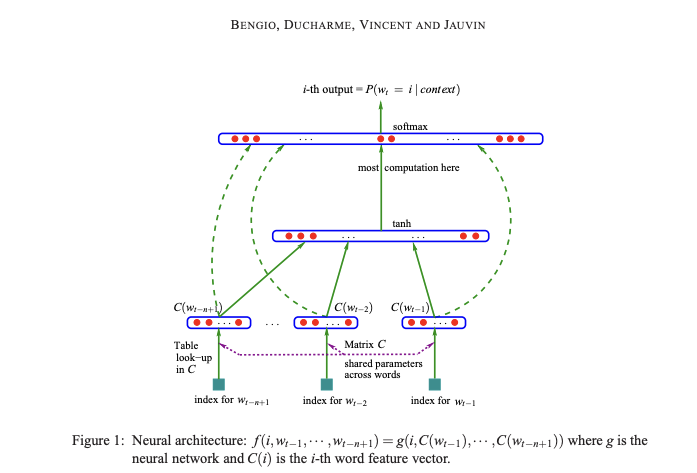

In [89]:
# building the dataset
block_size = 3 

def get_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for c in w+'.':
            i=stoi[c]
            X.append(context)
            Y.append(i)
            context=context[1:]+[i] #slide across

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

In [90]:
X[:5], Y[:5]

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1]]),
 tensor([ 5, 13, 13,  1,  0]))

In [91]:
C = torch.randn((27,2))
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [92]:
W1=torch.randn((6, 100))
b1=torch.randn(100)

In [93]:
h=torch.tanh(emb.view(-1,6)@W1+b1) # view infers the shape for -1. this is simulating multiple different inputs being passed from the training set
h.shape

torch.Size([228146, 100])

In [94]:
W2=torch.randn((100,27))
b2=torch.randn(27)

In [95]:
logits=h@W2+b2
logits.shape

torch.Size([228146, 27])

In [96]:
train, val, test = torch.utils.data.random_split(words, [0.8, 0.1, 0.1])

Xtr, Ytr = get_dataset(train)
Xval, Yval = get_dataset(val)
Xte, Yte = get_dataset(test)


torch.Size([182456, 3]) torch.Size([182456])
torch.Size([22827, 3]) torch.Size([22827])
torch.Size([22863, 3]) torch.Size([22863])


In [97]:
g = torch.Generator().manual_seed(29)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
params = [C, W1, b1, W2, b2]
sum(p.nelement() for p in params)

11897

In [98]:
for p in params:
    p.requires_grad = True

Video explanation for choosing an optimal learning rate is a bit sketch??

In [99]:
lossi, stepi = [1e10], []

In [105]:
lr = 0.01

In [101]:
ix.shape[0]

32

In [107]:
for i in range(100000):
    # minibatch
    ix=torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 10) for 10 dim embedding
    h = torch.tanh(emb.view(-1, 30)@W1+b1)
    logits = h@W2+b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    # update
    # if loss>lossi[-1]:
    #     lr/=2
    for p in params:
        p.data-=lr*p.grad

    stepi.append(i)
    lossi.append(loss.log10().item())


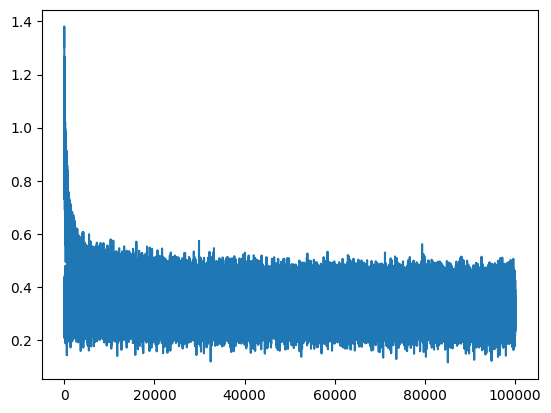

In [61]:
# lossi.pop(0)
plt.plot(stepi, lossi)

In [62]:
emb = C[Xtr] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1117, grad_fn=<NllLossBackward0>)

In [63]:
emb = C[Xval] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yval)
loss

tensor(2.1590, grad_fn=<NllLossBackward0>)

<Figure size 800x800 with 0 Axes>

Text(0.3419203460216522, -0.4307975172996521, '.')

Text(-0.3379333019256592, -0.3434666097164154, 'a')

Text(0.7016803622245789, 1.138628602027893, 'b')

Text(0.08568903803825378, 1.3483003377914429, 'c')

Text(0.42422619462013245, 0.811377763748169, 'd')

Text(-0.698428750038147, -0.19070686399936676, 'e')

Text(0.5522995591163635, 0.9137028455734253, 'f')

Text(0.2991260588169098, 0.8359740376472473, 'g')

Text(0.5112569332122803, 0.046589069068431854, 'h')

Text(-0.5625125765800476, 0.2490076720714569, 'i')

Text(-1.1632834672927856, -0.748447060585022, 'j')

Text(-0.7231592535972595, -0.8327353596687317, 'k')

Text(-0.6129165887832642, 1.0755071640014648, 'l')

Text(0.7268735766410828, 0.45592576265335083, 'm')

Text(0.2807296812534332, 0.2244080901145935, 'n')

Text(-0.14478875696659088, -0.13588836789131165, 'o')

Text(0.270580530166626, 1.1436662673950195, 'p')

Text(-2.1454389095306396, -0.6386675834655762, 'q')

Text(0.40803033113479614, 0.5417653322219849, 'r')

Text(0.05025765672326088, 0.7473304867744446, 's')

Text(0.1437179446220398, 0.8538012504577637, 't')

Text(-0.36433500051498413, -0.019221562892198563, 'u')

Text(-0.2327461540699005, 1.4803828001022339, 'v')

Text(0.37335702776908875, 0.730987548828125, 'w')

Text(0.05481956526637077, 0.5360190272331238, 'x')

Text(-0.2040720134973526, 0.3082779347896576, 'y')

Text(0.423245370388031, 0.5487025380134583, 'z')

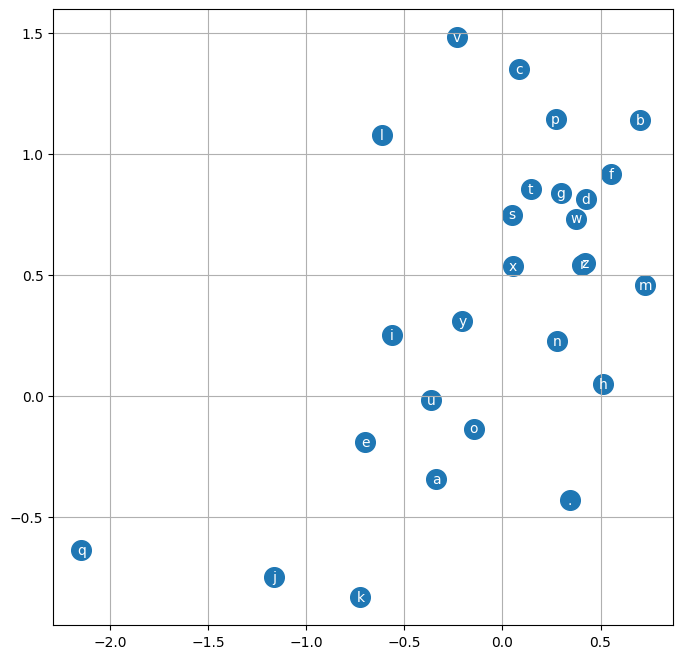

In [81]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [113]:
# sampling names
g = torch.Generator().manual_seed(29)

for _ in range(10):
    out=[]
    context=[0]*block_size
    while True:
        emb=C[torch.tensor([context])]
        h=torch.tanh(emb.view(1,-1)@W1+b1)
        logits=h@W2+b2
        probs=F.softmax(logits, dim=1)
        i=torch.multinomial(probs, num_samples=1, generator=g).item()
        context=context[1:]+[i]
        out.append(i)
        if i==0:
            break
    print(''.join(itos[i] for i in out))

magden.
jesin.
det.
dawhonu.
emrorderbin.
max.
foquigila.
laykydo.
natanvi.
delena.
